# Feature Selection Notebook:

This notebook contains the code for preprocessing and feature selection.

We run the `preprocess_and_train` function from `preptrain.py` and save the selected features to a separate .csv file, `df_selected.csv`, which we use in our models in the `Models.ipynb`.

In [1]:
import pandas as pd
import numpy as np
import time

import os
os.chdir('/sfs/qumulo/qhome/bdr6qz/Documents/MSDS/DS6050')
from preptrain import preprocess_and_train
from helper_functions import print_importances, print_dict_imps, avg_imps, plot_corr_heatmap

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
# Load the data
df = pd.read_csv('df_clean.csv')
df_last = pd.read_csv('df_last.csv')
labels = df.pop("mvp_share")
stratify = df.pop("Rank")

In [3]:
start_time = time.time()

# Call the function to preprocess the data and perform feature selection
(features_rf,
 features_Dtree,
 features_pca, 
 features_gbm,
 features_svr, 
 features_Xtrees,
 features_Ada,
 features_XGB,
 feature_importances) = preprocess_and_train(df, df_last, labels)

end_time = time.time()
execution_time = end_time - start_time
print(f"Feature Selection execution time: {round(execution_time/60, 2)} minutes")

/home/bdr6qz/.local/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 'scale', 'linear'] before, using random point [0.40395035952432146, 'auto', 'poly']
  warnings.warn(
/home/bdr6qz/.local/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 3, 1.0, 1, 2, 100] before, using random point [False, 10, 1.0, 3, 17, 235]
  warnings.warn(
/home/bdr6qz/.local/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [False, 10, 1.0, 1, 2, 500] before, using random point [True, 10, 0.1, 3, 14, 325]
  warnings.warn(


Feature Selection execution time: 6.38 minutes


In [4]:
# Print selected features
print("RF:", features_rf)
print(f"PCA 1: {features_pca[0]}")
print("GBM:", features_gbm)
print("SVR:", features_svr)
print("Xtrees:", features_Xtrees)
print("AdaBoost:", features_Ada)
print("XGBoost:", features_XGB)

RF: ['WS', 'VORP', 'BPM', 'PER', 'OBPM', 'WS/48', 'Rk_Year', 'Rk_Conf', 'OWS', 'Overall']
PCA 1: ['FGA', 'FT', 'VORP', 'MP', 'FTA', '2P', 'PER', 'FG', 'PTS', 'WS']
GBM: ['WS', 'PER', 'PTS', 'VORP', 'BPM', 'Rk_Conf', 'DBPM', 'Overall', 'WS/48', 'DWS']
SVR: ['MP', 'TS%', 'TRB%', 'TOV', 'OWS', 'WS/48', 'FTA', 'DRB%', 'FT', 'eFG%']
Xtrees: ['VORP', 'WS', 'PER', 'BPM', 'WS/48', 'Rk_Conf', 'Rk_Year', 'OBPM', 'Overall', 'OWS']
AdaBoost: ['PER', 'VORP', 'WS', 'Rk_Conf', 'TOV', 'BPM', 'WS/48', 'Rk_Year', 'FGA', 'DWS']
XGBoost: ['VORP', 'Rk_Conf', 'PER', 'WS', 'Rk_Year', 'FGA', 'PTS', 'AST', 'OBPM', 'height']


In [5]:
print_dict_imps(feature_importances)

       Random Forest                 Decision Tree                      PCA                           GBM             
│ Feature   │   Importance │  │ Feature   │   Importance │  │ Feature   │   Importance │  │ Feature   │   Importance │
╞═══════════╪══════════════╡  ╞═══════════╪══════════════╡  ╞═══════════╪══════════════╡  ╞═══════════╪══════════════╡
│ Rk_Year   │      0.0282  │  │ WS        │      0.04261 │  │ WS        │      0.21956 │  │ DBPM      │      0.02719 │
├───────────┼──────────────┤  ├───────────┼──────────────┤  ├───────────┼──────────────┤  ├───────────┼──────────────┤
│ Rk_Conf   │      0.01589 │  │ USG%      │      0.00199 │  │ PTS       │      0.21866 │  │ Overall   │      0.01718 │
├───────────┼──────────────┤  ├───────────┼──────────────┤  ├───────────┼──────────────┤  ├───────────┼──────────────┤
│ WS/48     │      0.00636 │  │ FTr       │      3e-05   │  │ FG        │      0.21612 │  │ DWS       │      0.01026 │
├───────────┼──────────────┤  ├───────────┼─────

In [6]:
avg_imp = avg_imps(feature_importances)

1. WS/48: 0.21779
2. 2P: 0.20903
3. MP: 0.11873
4. FG: 0.10806
5. FTA: 0.10431
6. FT: 0.10303
7. PTS: 0.07798
8. FGA: 0.07099
9. WS: 0.04064
10. VORP: 0.03433
11. PER: 0.03369
12. eFG%: 0.02088
13. AST: 0.01787
14. Rk_Year: 0.01599
15. DBPM: 0.01360
16. TS%: 0.01345
17. TOV: 0.00872
18. DWS: 0.00826
19. Overall: 0.00807
20. OBPM: 0.00575
21. Rk_Conf: 0.00557
22. BPM: 0.00428
23. OWS: 0.00222
24. USG%: 0.00199
25. height: 0.00182
26. TRB%: 0.00023
27. DRB%: 0.00020
28. FTr: 0.00003
Top 10 Features: ['WS/48', '2P', 'MP', 'FG', 'FTA', 'FT', 'PTS', 'FGA', 'WS', 'VORP']


### These are interesting, but we know many of the features related to points (scoring) are highly correlated, for example:

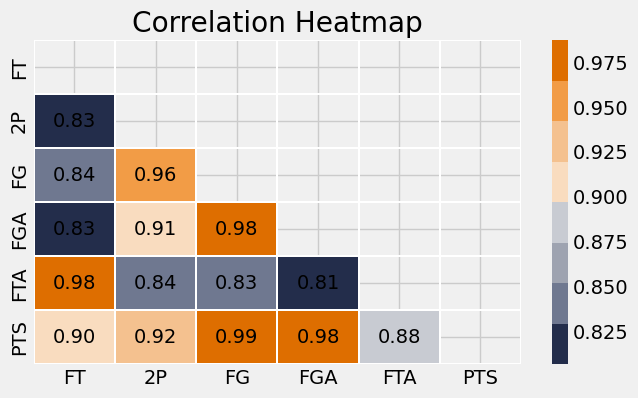

In [7]:
score_related = df[['FT', '2P', 'FG', 'FGA', 'FTA', 'PTS']]

corr_matrix_ties = score_related.corr()
plot_corr_heatmap(corr_matrix_ties, score_related)

### Points (PTS) should capture all of these, for the most part, so we'll not include FTA, FGA, FG, 2P, or FT.

### Moving to the next-highest features in terms of importance, we get:

1. WS/48: 0.21779
2. MP: 0.11873
3. PTS: 0.07798
4. WS: 0.04064
5. VORP: 0.03433
6. PER: 0.03369
7. eFG%: 0.02088
8. AST: 0.01787
9. Rk_Year: 0.01599
10. DBPM: 0.01360

In [8]:
selected_features = ['WS/48', 'MP', 'PTS', 'WS', 'VORP', 'PER', 'eFG%', 'AST', 'Rk_Year', 'DBPM']

---

## Selected Features:

- WS/48 = Win Shares per 48.

- MP = Minutes Played.

- PTS = Points.

- WS = Win Shares (see <a href="https://www.basketball-reference.com/about/ws.html">NBA Win Shares)</a> for information about how this feature is calculated).

- VORP = Value Over Replacement Player

- PER = Player Efficiency Rating (see <a href="https://www.basketball-reference.com/about/per.html">Calculating PER</a> for the formula).

- eFG% = Effective Field Goal Percentage.

- AST = Assists.

- Rk_Year = Team Ranking.

- DBPM = Defensive Box Plus-Minus.

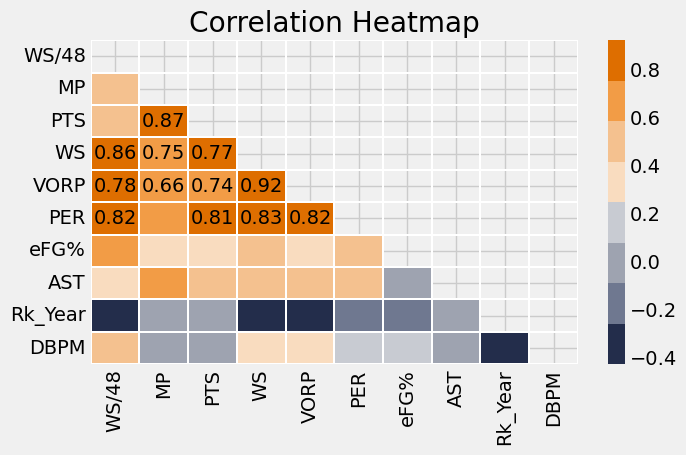

In [9]:
# Select only the columns corresponding to the top 10 features
df_check_selected = df[selected_features]
corr_matrix = df_check_selected.corr()

plot_corr_heatmap(corr_matrix, selected_features)

### Some of our selected features are highly correlated, but let's proceed to modeling and index buidling for now.

In [10]:
df_selected = df[selected_features]
df_selected.to_csv('df_selected.csv', index=False)